In [26]:
from sklearn.metrics import mean_squared_error as MSE
import numpy as np
import matplotlib.pyplot as plt

In [95]:
def f(state, t):
    alpha, beta = state
    return alpha*(t**2) + beta
    
#True data
t_range = np.linspace(0,10, 20)
True_data = f((3, 20), t_range)


In [124]:
np.random.normal([10,50,4,2]),

(array([10.50274983, 50.7371098 ,  3.25219935,  4.00280402]),)

In [125]:


def Simulated_Annealing(s0, Cooling_schedule = "linear", function = MSE, T_start = 100, sigma = 0.1, data = (t_range, True_data)):
    if Cooling_schedule == "linear":
        T_sched = np.linspace(100, 0.1, 5000)
    state = s0
    pred = f(state, data[0])

    for T in T_sched:
        state_new = np.random.normal(state, scale = sigma)
        U = np.random.rand()

        pred_new = f(state_new, data[0])

        threshold = np.min(np.exp(-(function(data[1], pred_new) - function(data[1], pred))/T))
        if U <= threshold:
            state = state_new
            pred = pred_new 
        else: 
            state = state
    
    return state

    
#This function can be deleted perhaps later
def Simulated_Annealing_2(s0, Cooling_schedule = "linear", function = MSE, T_start = 100, sigma = 0.1, data = (t_range, True_data)):
    if Cooling_schedule == "linear":
        T_sched = np.linspace(100, 0.1, 5000)
    state = s0
    pred = f(state, data[0])

    for T in T_sched:
        
        #loop over parameters
        for i in range(len(state)): 
            state_new = state
            state_new[i] = np.random.normal(state[i], scale = sigma)
            U = np.random.rand()

            pred_new = f(state_new, data[0])

            threshold = np.min(np.exp(-(function(data[1], pred_new) - function(data[1], pred))/T))
            if U <= threshold:
                state = state_new
                pred = pred_new 
            else: 
                state = state
    
    return state

In [120]:
#np.random.seed(123213)
state_pred = Simulated_Annealing([5, 18])
state_pred_2 = Simulated_Annealing_2([5, 18])


In [121]:
print(state_pred)
print(state_pred_2)

(2.9094779577581575, 26.671918855632267)
[8.593811724557494, 14.46927645469862]


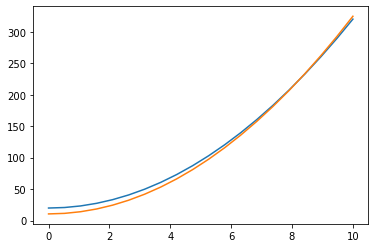

In [98]:
plt.plot(t_range, True_data)
plt.plot(t_range, f(state_pred, t_range))
plt.show()